<a href="https://colab.research.google.com/github/FramiFlores/Data_Mining/blob/main/Frami_Clase2_notebook_Ejer2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#LIBRERIAS BASICAS    # NO MODIFICAR

from google.colab import files
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
%matplotlib inline

In [2]:
# FUNCIONES PARA CLUSTERING       # NO MODIFICAR

def normalize(df):
    dfb = df.copy()
    for x in df.columns:
        dfb[x] = (df[x]-df[x].min())/(df[x].max()-df[x].min())
    return dfb   
    
def centroides(a,b):
    res = pd.DataFrame(data=b)
    i=0
    for x in a.columns:
        res.rename(columns={i:x},inplace=True)
        i = i+1
    res.reset_index(inplace=True)
    res.rename(columns={'index':'cluster'},inplace=True)
    return res 
    
def clusteres(a,b): 
    lab = pd.DataFrame(data=b)
    ax = a.join(lab)
    ax.rename(columns={0:'cluster'},inplace=True)  
    return ax

def elbow(X):
    sum_of_squared_distances = []
    K = range(1,15)
    for k in K:
        k_means = KMeans(n_clusters=k)
        model = k_means.fit(X)
        sum_of_squared_distances.append(k_means.inertia_)

    plt.plot(K, sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('sum_of_squared_distances')
    plt.title('elbow method for optimal k')
    plt.show()
    return sum_of_squared_distances

def silhouette(X):
    sil = []
    K = range(2, 15)
    for k in K:
      kmeans = KMeans(n_clusters = k).fit(X)
      labels = kmeans.labels_
      sil.append(silhouette_score(X, labels, metric = 'euclidean'))

    plt.plot(K, sil, 'bx-')
    plt.xlabel('k')
    plt.ylabel('silhouette score')
    plt.title('silhouette method for optimal k')
    plt.show()
    return sil

In [3]:
#DATA LOADING & PREVIEW          # MODIFICAR "url" y asegurarse de usar bien el separador "sep", en este ejemplo es ";"

url = 'https://raw.githubusercontent.com/FramiFlores/Data_Mining/main/clustering_data2.csv'
df = pd.read_csv(url,sep=';')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
#DATA PREPARATION (VERY IMPORTANT TO DIFFERENTIATE "X" AND "DF")

X = df.drop(columns='country')    # SIEMPRE ELIMINAR CUALQUIER "ID" o VARIABLE QUE NO VAYA ENTRAR AL MODELO
X = normalize(X)        # MIN-MAX ESTANDARIZACION

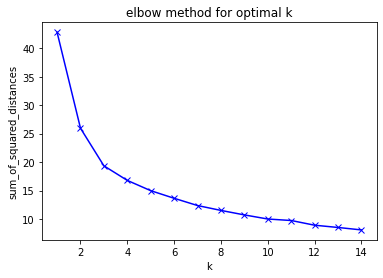

[42.79871877568752, 25.947360933529875, 19.345622038883597, 16.78445280364494, 14.984580851917165, 13.647504500426361, 12.373730387433511, 11.51644497894385, 10.729146425833424, 10.007800151689544, 9.745775455274643, 8.920070829203146, 8.524336223334057, 8.094380979719702]


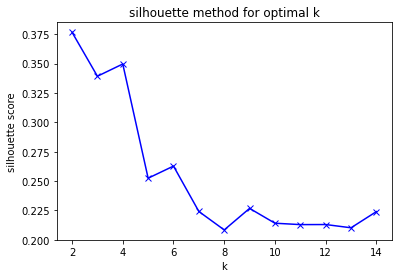

[0.37671430588173554, 0.3392590990402198, 0.34967581498248707, 0.25244720981481855, 0.26275109753972337, 0.22409635765639463, 0.20840890603267104, 0.22674241346492713, 0.21411366283264321, 0.21293053042077145, 0.21298693666990773, 0.2102240421499929, 0.2239988287603316]


In [6]:
# OPTIMAL NUMBER "K" OF CLUSTERS          # NO MODIFICAR

print(elbow(X))
print(silhouette(X))

In [8]:
# ALGORITHM FIT 

kmeans = KMeans(n_clusters=5, random_state=44).fit(X)     # AQUI PRECISAR EL NUMERO DE CLUSTERS "n_clusters"

In [9]:
# CLUSTER CENTROIDS       # NO MODIFICAR

print('Centroides optimos de clusteres')
print(centroides(X,kmeans.cluster_centers_))

Centroides optimos de clusteres
   cluster  child_mort   exports  ...  life_expec  total_fer      gdpp
0        0    0.158482  0.179280  ...    0.727896   0.274414  0.034470
1        1    0.012171  0.223818  ...    0.953393   0.108599  0.430387
2        2    0.465588  0.135823  ...    0.530043   0.643879  0.011098
3        3    0.007465  0.879935  ...    0.973044   0.036278  0.547258
4        4    0.045424  0.235103  ...    0.855858   0.105931  0.099871

[5 rows x 10 columns]


In [10]:
# CLUSTER RESULTS          # NO MODIFICAR

print('Asignacion de clusteres segun cada observacion')     
print(clusteres(df,kmeans.labels_).head())

Asignacion de clusteres segun cada observacion
               country  child_mort  exports  ...  total_fer   gdpp  cluster
0          Afghanistan        90.2     10.0  ...       5.82    553        2
1              Albania        16.6     28.0  ...       1.65   4090        4
2              Algeria        27.3     38.4  ...       2.89   4460        0
3               Angola       119.0     62.3  ...       6.16   3530        2
4  Antigua and Barbuda        10.3     45.5  ...       2.13  12200        4

[5 rows x 11 columns]


In [11]:
# EXPORT RESULTS
centroides(X,kmeans.cluster_centers_).to_csv('centroides.csv')          #se puede cambiar nombre del csv si se desea (cambiar en download tmb)
files.download('centroides.csv')

clusteres(df,kmeans.labels_).to_csv('resultados.csv')      #se puede cambiar nombre del csv si se desea (cambiar en download tmb)
files.download('resultados.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>